In [1]:
import numpy as np, scipy as sp, matplotlib.pyplot as plt
from scipy import signal

# 1. Especificações do filtro
Gp = -3 # Ganho faixa de passagem dB
Gr = -45 # Ganho faixa de rejeição dB
Ap = -Gp # Atenuação faixa de passagem dB
Ar = -Gr # Atenuação faixa de rejeição dB
wr1 = 1394*np.pi # rad/s
wp1 = 1510*np.pi # rad/s
wp2 = 1570*np.pi # rad/s
wr2 = 1704*np.pi # rad/s

print("   ESPECIFICACOES DO FILTRO")
print("Gp: %d dB"%Gp)
print("Gr: %d dB"%Gr)
print("wr1: %d rad/s"%wr1)
print("wp1: %d rad/s"%wp1)
print("wp2: %d rad/s"%wp2)
print("wr2: %d rad/s"%wr2)

   ESPECIFICACOES DO FILTRO
Gp: -3 dB
Gr: -45 dB
wr1: 4379 rad/s
wp1: 4743 rad/s
wp2: 4932 rad/s
wr2: 5353 rad/s


In [2]:
# 2. Determinar a ordem do filtro

ord1, wn1 = signal.buttord([wp1, wp2], [wr1, wr2], Ap, Ar, analog=True)
ord2, wn2 = signal.cheb1ord([wp1, wp2], [wr1, wr2], Ap, Ar, analog=True)
ord3, wn3 = signal.cheb2ord([wp1, wp2], [wr1, wr2], Ap, Ar, analog=True)
ord4, wn4 = signal.ellipord([wp1, wp2], [wr1, wr2], Ap, Ar, analog=True)

ord1, ord2, ord3, ord4

(4, 3, 3, 3)

In [3]:
# 3. Projeto dos filtros
z1, p1, k1 = signal.butter(ord1, wn1, btype='bp', analog=True, output='zpk')
z2, p2, k2 = signal.cheby1(ord2, Ap, wn2, btype='bp', analog=True, output='zpk')
z3, p3, k3 = signal.cheby2(ord3, Ar, wn3, btype='bp', analog=True, output='zpk')
z4, p4, k4 = signal.ellip(ord4, Ap, Ar, wn4, btype='bp', analog=True, output='zpk')

sys1 = signal.lti(z1, p1, k1)
sys2 = signal.lti(z2, p2, k2)
sys3 = signal.lti(z3, p3, k3)
sys4 = signal.lti(z4, p4, k4)


## Avaliando a resposta em frequencia dos filtros projetados

In [28]:
# %matplotlib widget
%matplotlib inline

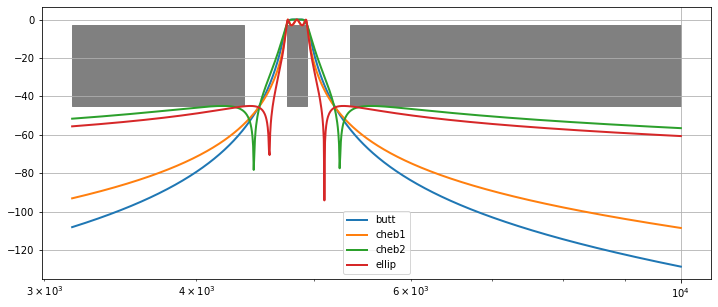

In [30]:
# vetor de frequencias
w = np.logspace(3.5, 4, 1000)
# Diagrama de Bode
w, mag1, phase1 = signal.bode(sys1, w)
w, mag2, phase2 = signal.bode(sys2, w)
w, mag3, phase3 = signal.bode(sys3, w)
w, mag4, phase4 = signal.bode(sys4, w)

plt.figure(figsize=(12,5))
plt.semilogx(w, mag1, lw=2) #Butter
plt.semilogx(w, mag2, lw=2) #Cheby 1
plt.semilogx(w, mag3, lw=2) #Cheby 2
plt.semilogx(w, mag4, lw=2) #Elíptico

# faz sombreados com as especificações do filtro
plt.fill([wp1, wp1, wp2, wp2],[Gr, Gp, Gp, Gr],c="0.5") # banda passagem
plt.fill([min(w), min(w), wr1, wr1],[Gr, Gp, Gp, Gr],c="0.5") # banda rejeição 1
plt.fill([wr2, wr2, max(w), max(w)],[Gr, Gp, Gp, Gr],c="0.5") # banda rejeição 2

plt.legend(['butt','cheb1','cheb2','ellip'])
plt.grid(1);

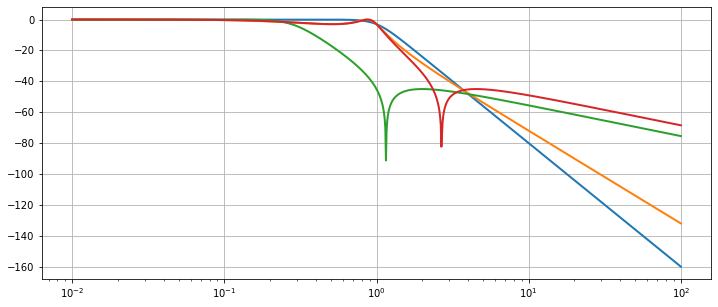

In [36]:
# Filtro prototipo
z1, p1, k1 = signal.buttap(ord1)
z2, p2, k2 = signal.cheb1ap(ord2, Ap)
z3, p3, k3 = signal.cheb2ap(ord3, Ar)
z4, p4, k4 = signal.ellipap(ord4, Ap, Ar)
sys1ap = signal.lti(z1, p1, k1)
sys2ap = signal.lti(z2, p2, k2)
sys3ap = signal.lti(z3, p3, k3)
sys4ap = signal.lti(z4, p4, k4)

# vetor de frequencias
w = np.logspace(-2, 2, 1000)
# Diagrama de Bode
w, mag1, phase1 = signal.bode(sys1ap, w)
w, mag2, phase2 = signal.bode(sys2ap, w)
w, mag3, phase3 = signal.bode(sys3ap, w)
w, mag4, phase4 = signal.bode(sys4ap, w)

plt.figure(figsize=(12,5))
plt.semilogx(w, mag1, lw=2) #Butter normalizado (protótipo)
plt.semilogx(w, mag2, lw=2) #Cheb1 normalizado (protótipo)
plt.semilogx(w, mag3, lw=2) #Cheb2 normalizado (protótipo)
plt.semilogx(w, mag4, lw=2) #Ellip normalizado (protótipo)

plt.grid(1)
plt.xlim;